In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import os
import math
working_directory = os.getcwd()

Loading excel file in jupyter notebook

In [2]:

path = working_directory + '/DS - Assignment Part 1 data set.xlsx'
df = pd.read_excel(path)

Getting a glimplse of data, so that to get a better overview of data, .head() by default displays top 5 rows of data


## Data Visualisation and exploratory data analysis

In [3]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Gives the no of columns and rows in data


In [4]:
df.shape

(414, 9)

Used to check null values in data


In [5]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

Gives an overview of data values


In [6]:
df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


As we are given the House age and the data is of 2012 and 2013 and 1 year will not make much difference  in prices and we are already given the age of house hence we do not require the transaction date, hence we will remove trasaction date columns

Dropping the Transaction date column                      
inplace = true makes this change permanent

In [7]:

df.drop(['Transaction date'], axis=1,inplace = True)

In [8]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


Here we are looking for outliers in our dataframe by using boxplot.
* In the Box plot, a box is created from the first quartile to the third quartile, 
   a vertical line is also there which goes through the box at the median.

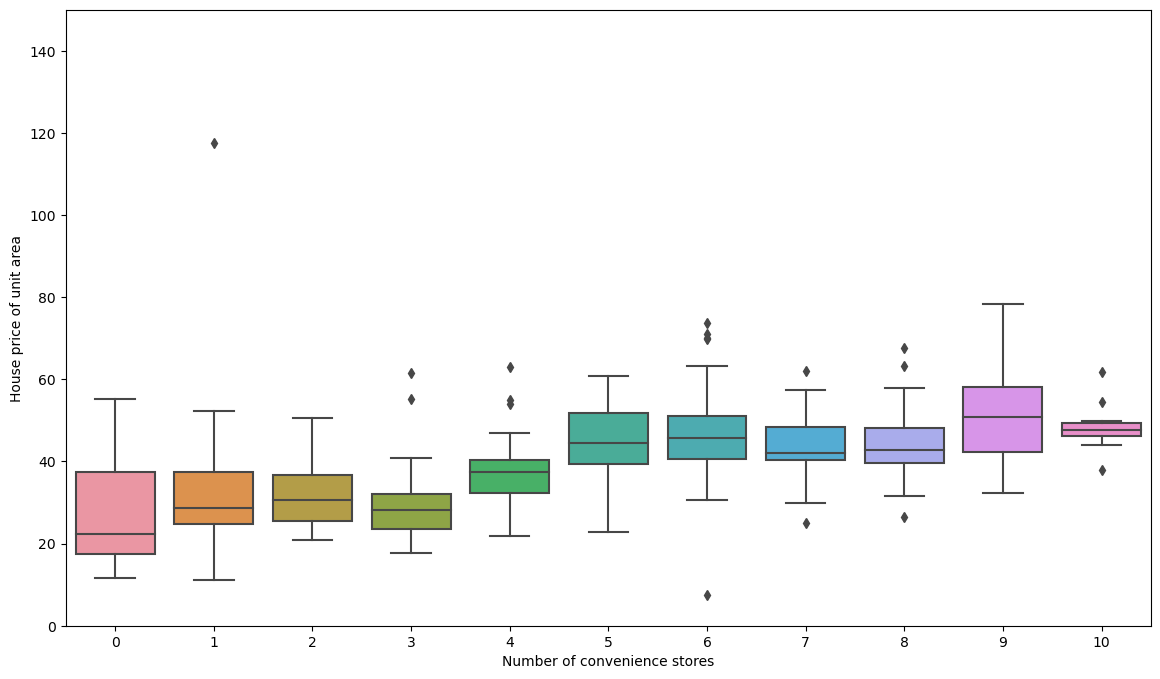

In [9]:
var = 'Number of convenience stores'
price = 'House price of unit area'
data = pd.concat([df[price], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y=price, data=data)
fig.axis(ymin=0, ymax=150);

* It is clearly visible that at two data points the values are way away from normal range, hence we will remove these


In [10]:
print(np.where(df['House price of unit area']>90))
print(np.where(df['House price of unit area']<10))

(array([270]),)
(array([113]),)


In [11]:
df.drop(df.index[270],inplace = True)
df.drop(df.index[113],inplace = True)

Here I will again draw boxplot to check for outliers

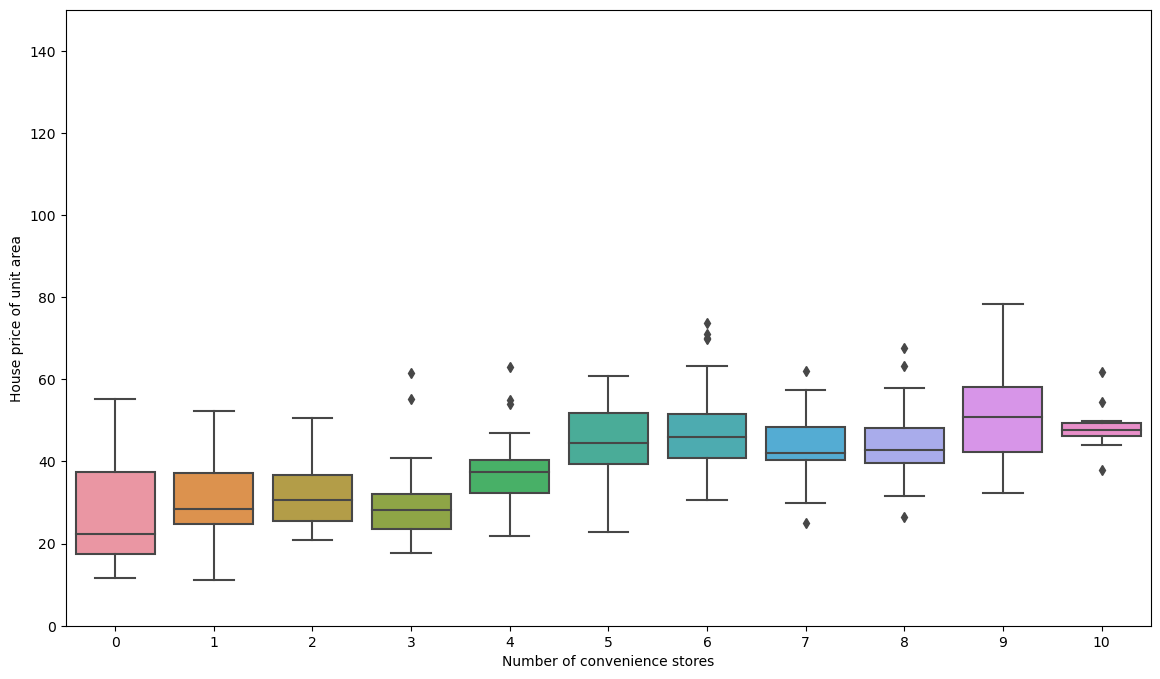

In [12]:
var = 'Number of convenience stores'
price = 'House price of unit area'
data = pd.concat([df[price], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y=price, data=data)
fig.axis(ymin=0, ymax=150);

* A Distplot or distribution plot, depicts the variation in the data distribution. Seaborn Distplot represents the overall distribution of continuous data variables.

* The Seaborn module along with the Matplotlib module is used to depict the distplot with different variations in it. 

/var/folders/n7/9tjpq7cd1nb13wz1sz652lvh0000gn/T/ipykernel_7129/4167830116.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['House price of unit area']);


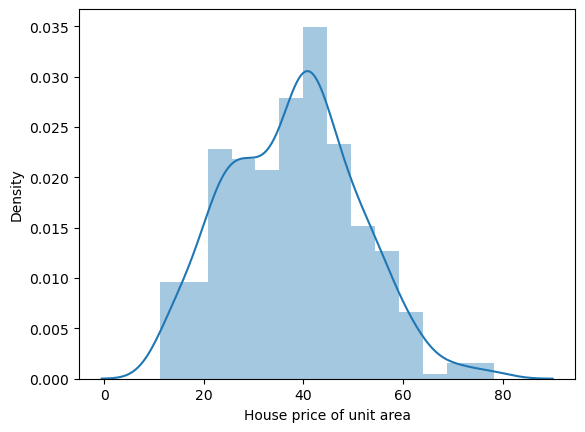

In [13]:
sns.distplot(df['House price of unit area']);

Now I have plotted scatter plot it showing the variation of distance from metro station and the price of house
* Here the most important inference is that the houses with the lesser distance from metro station are having higher price per unit area
* The second inference is that distance inversely impacts the price variable, as the distance decreases the price increases and vice-versa

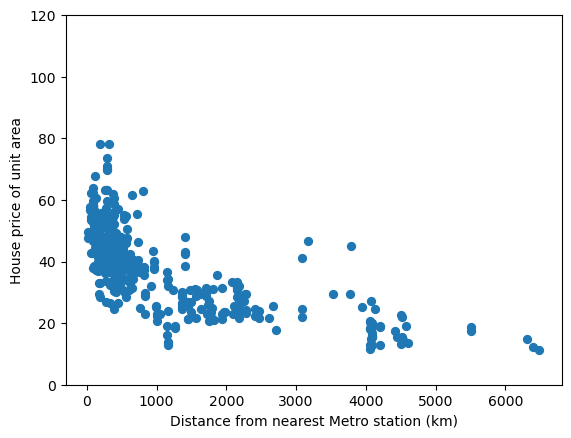

In [15]:
distance = 'Distance from nearest Metro station (km)'
price = 'House price of unit area'
data = pd.concat([df[price], df[distance]], axis=1)
data.plot.scatter(x=distance, y=price, ylim=(0,120), s=32);

Now let's again draw scatter plot, this time between price and age of house. This will let us know if there is any relation between them

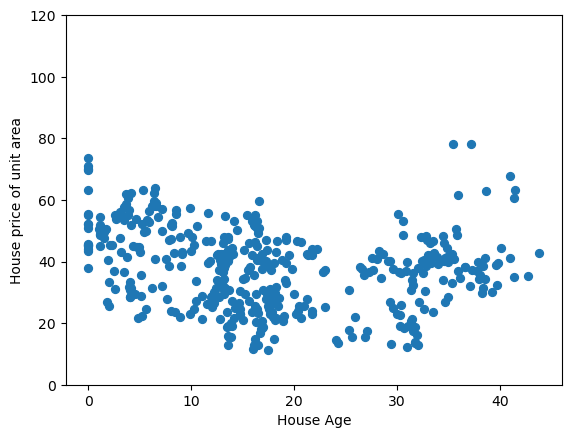

In [17]:
age = 'House Age'
price = 'House price of unit area'
data = pd.concat([df[price], df[size]], axis=1)
data.plot.scatter(x=age, y=price, ylim=(0,120), s=32);

From the scatter plot it is visible that there isn't any good relation between these variables. 
* One observation that can be made is that the house aged between 20-30 years have least price per unit area

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

A correlation matrix is a common tool used to compare the coefficients of correlation between different features (or attributes) in a dataset. It allows us to visualize how much (or how little) correlation exists between different variables.
* More the value close to 1 shows a greater correlation (with positive sign)
* More the value close to 0 shows a weaker or no correlation 
* If the value is having negative sign and magnitude close to 1, it shows that both are negatively correlated. If one increases then other decreases

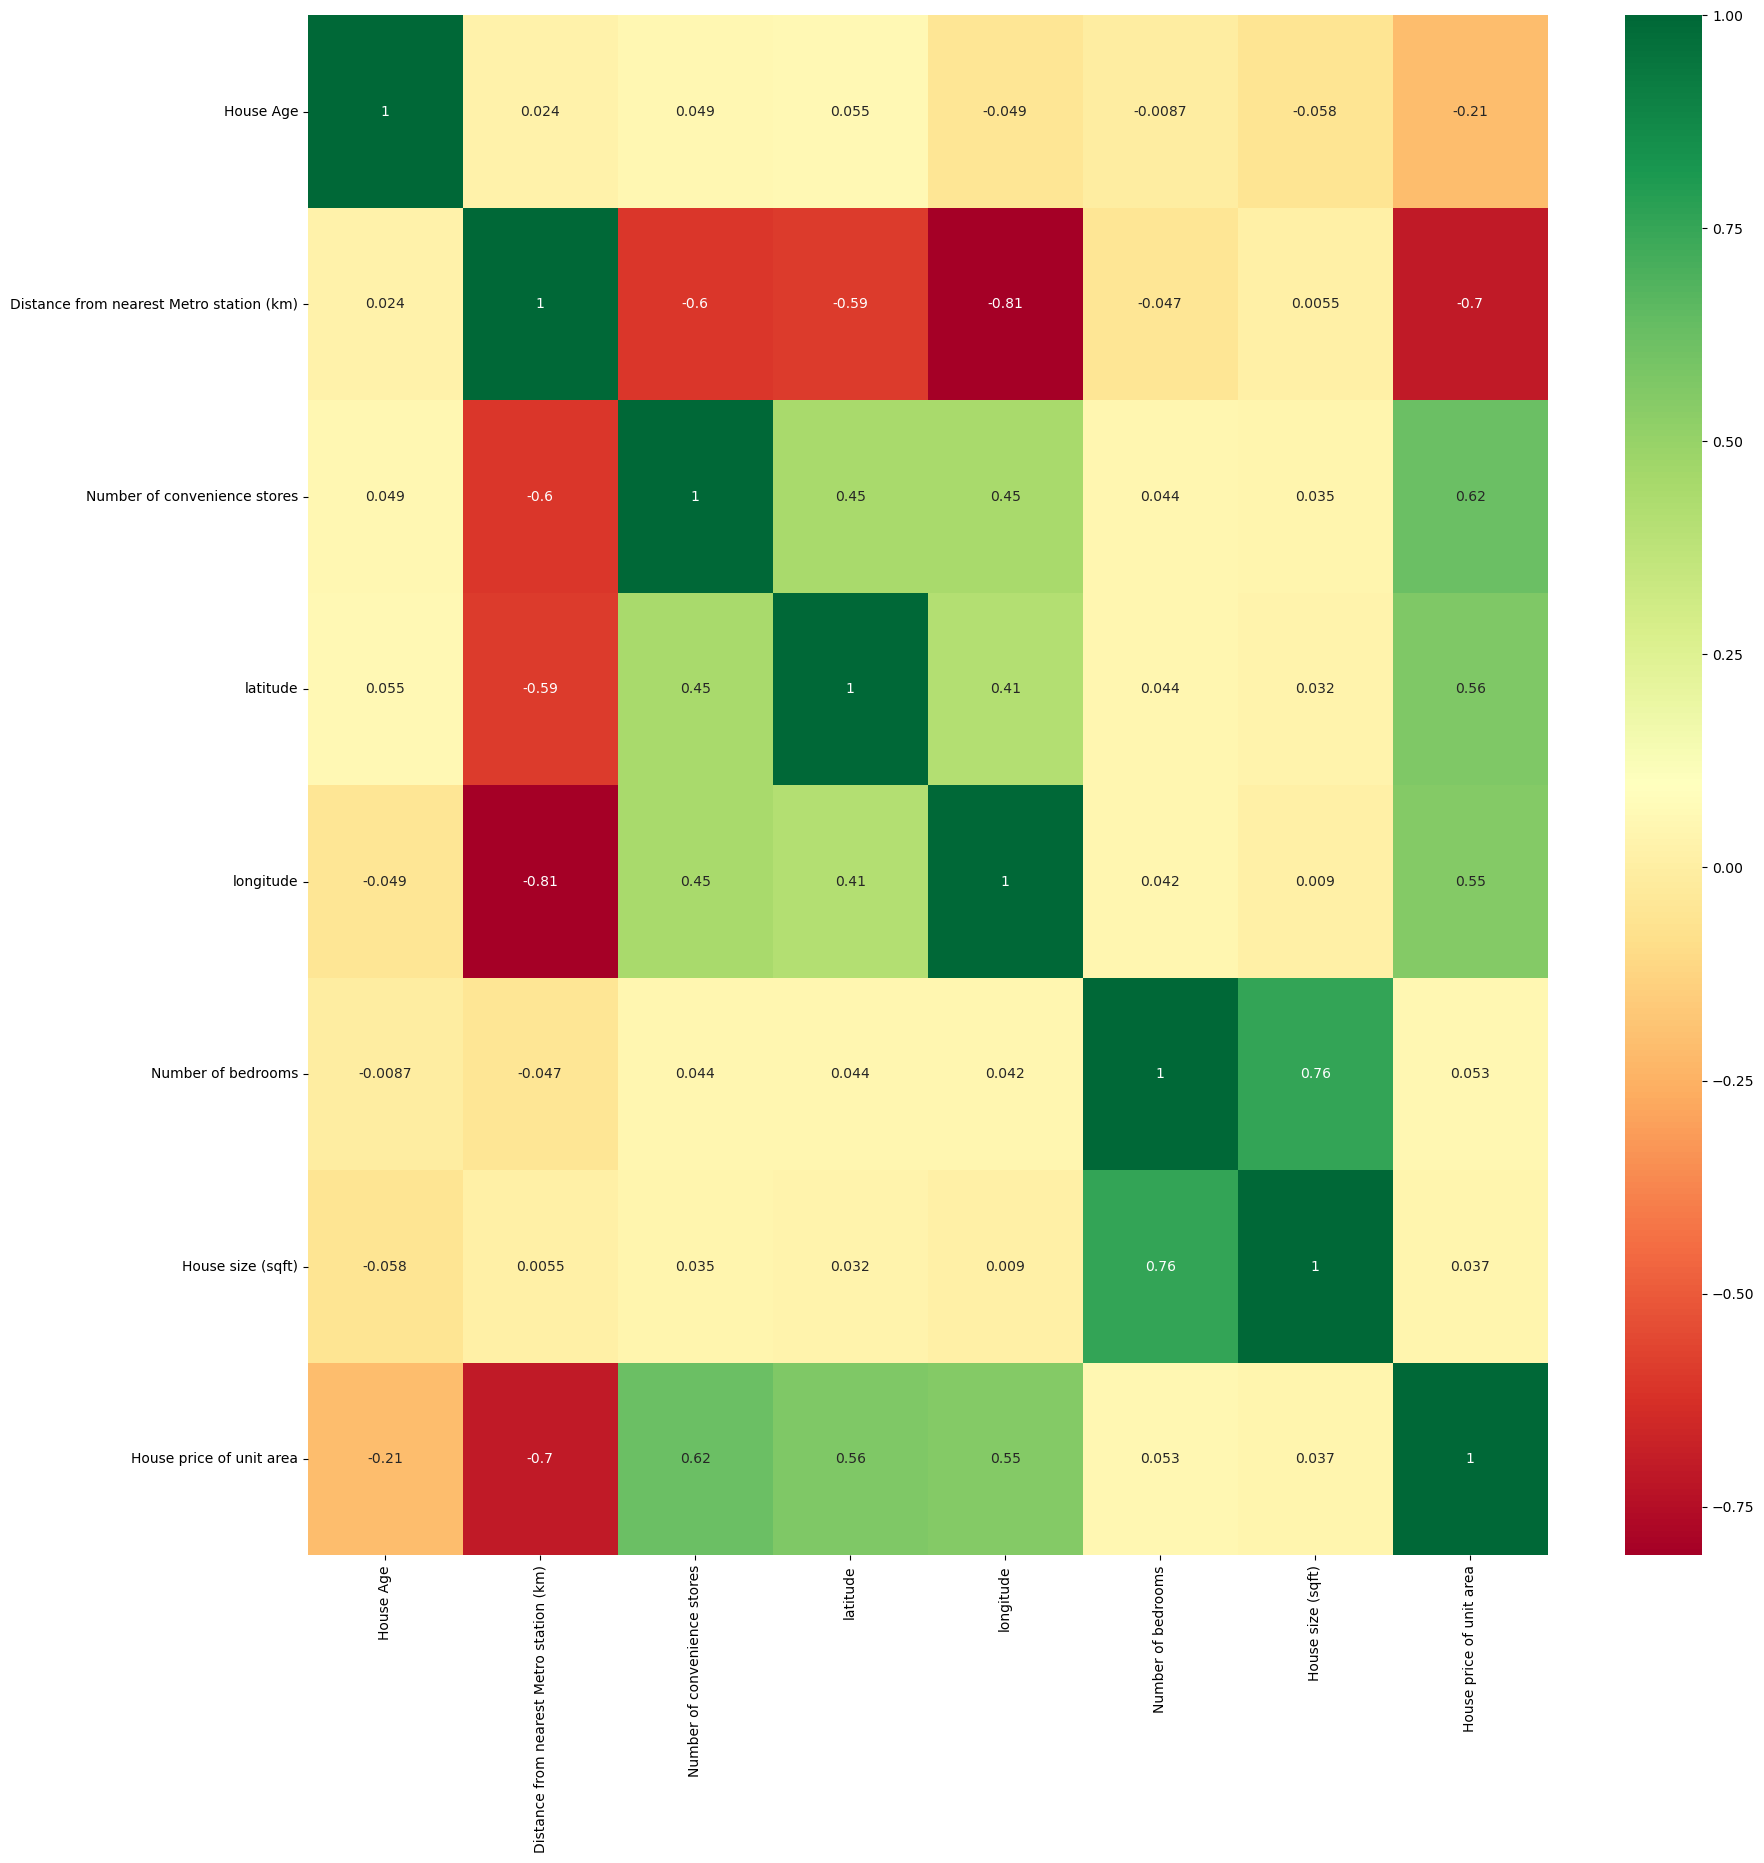

In [18]:
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Some observations form the above correlation matrix
1. Latitude, Longitude and number of convienience stores directly impact the house price as they have positive correlation with house price and have significant correlation values.
2. The second observation is that the distance from the nearest metro station is largely negatively correlated with the house price and has a significant larger magnitude. Hence it is one of the best feature to take into consideration as it inversely impacts the price.

#### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.

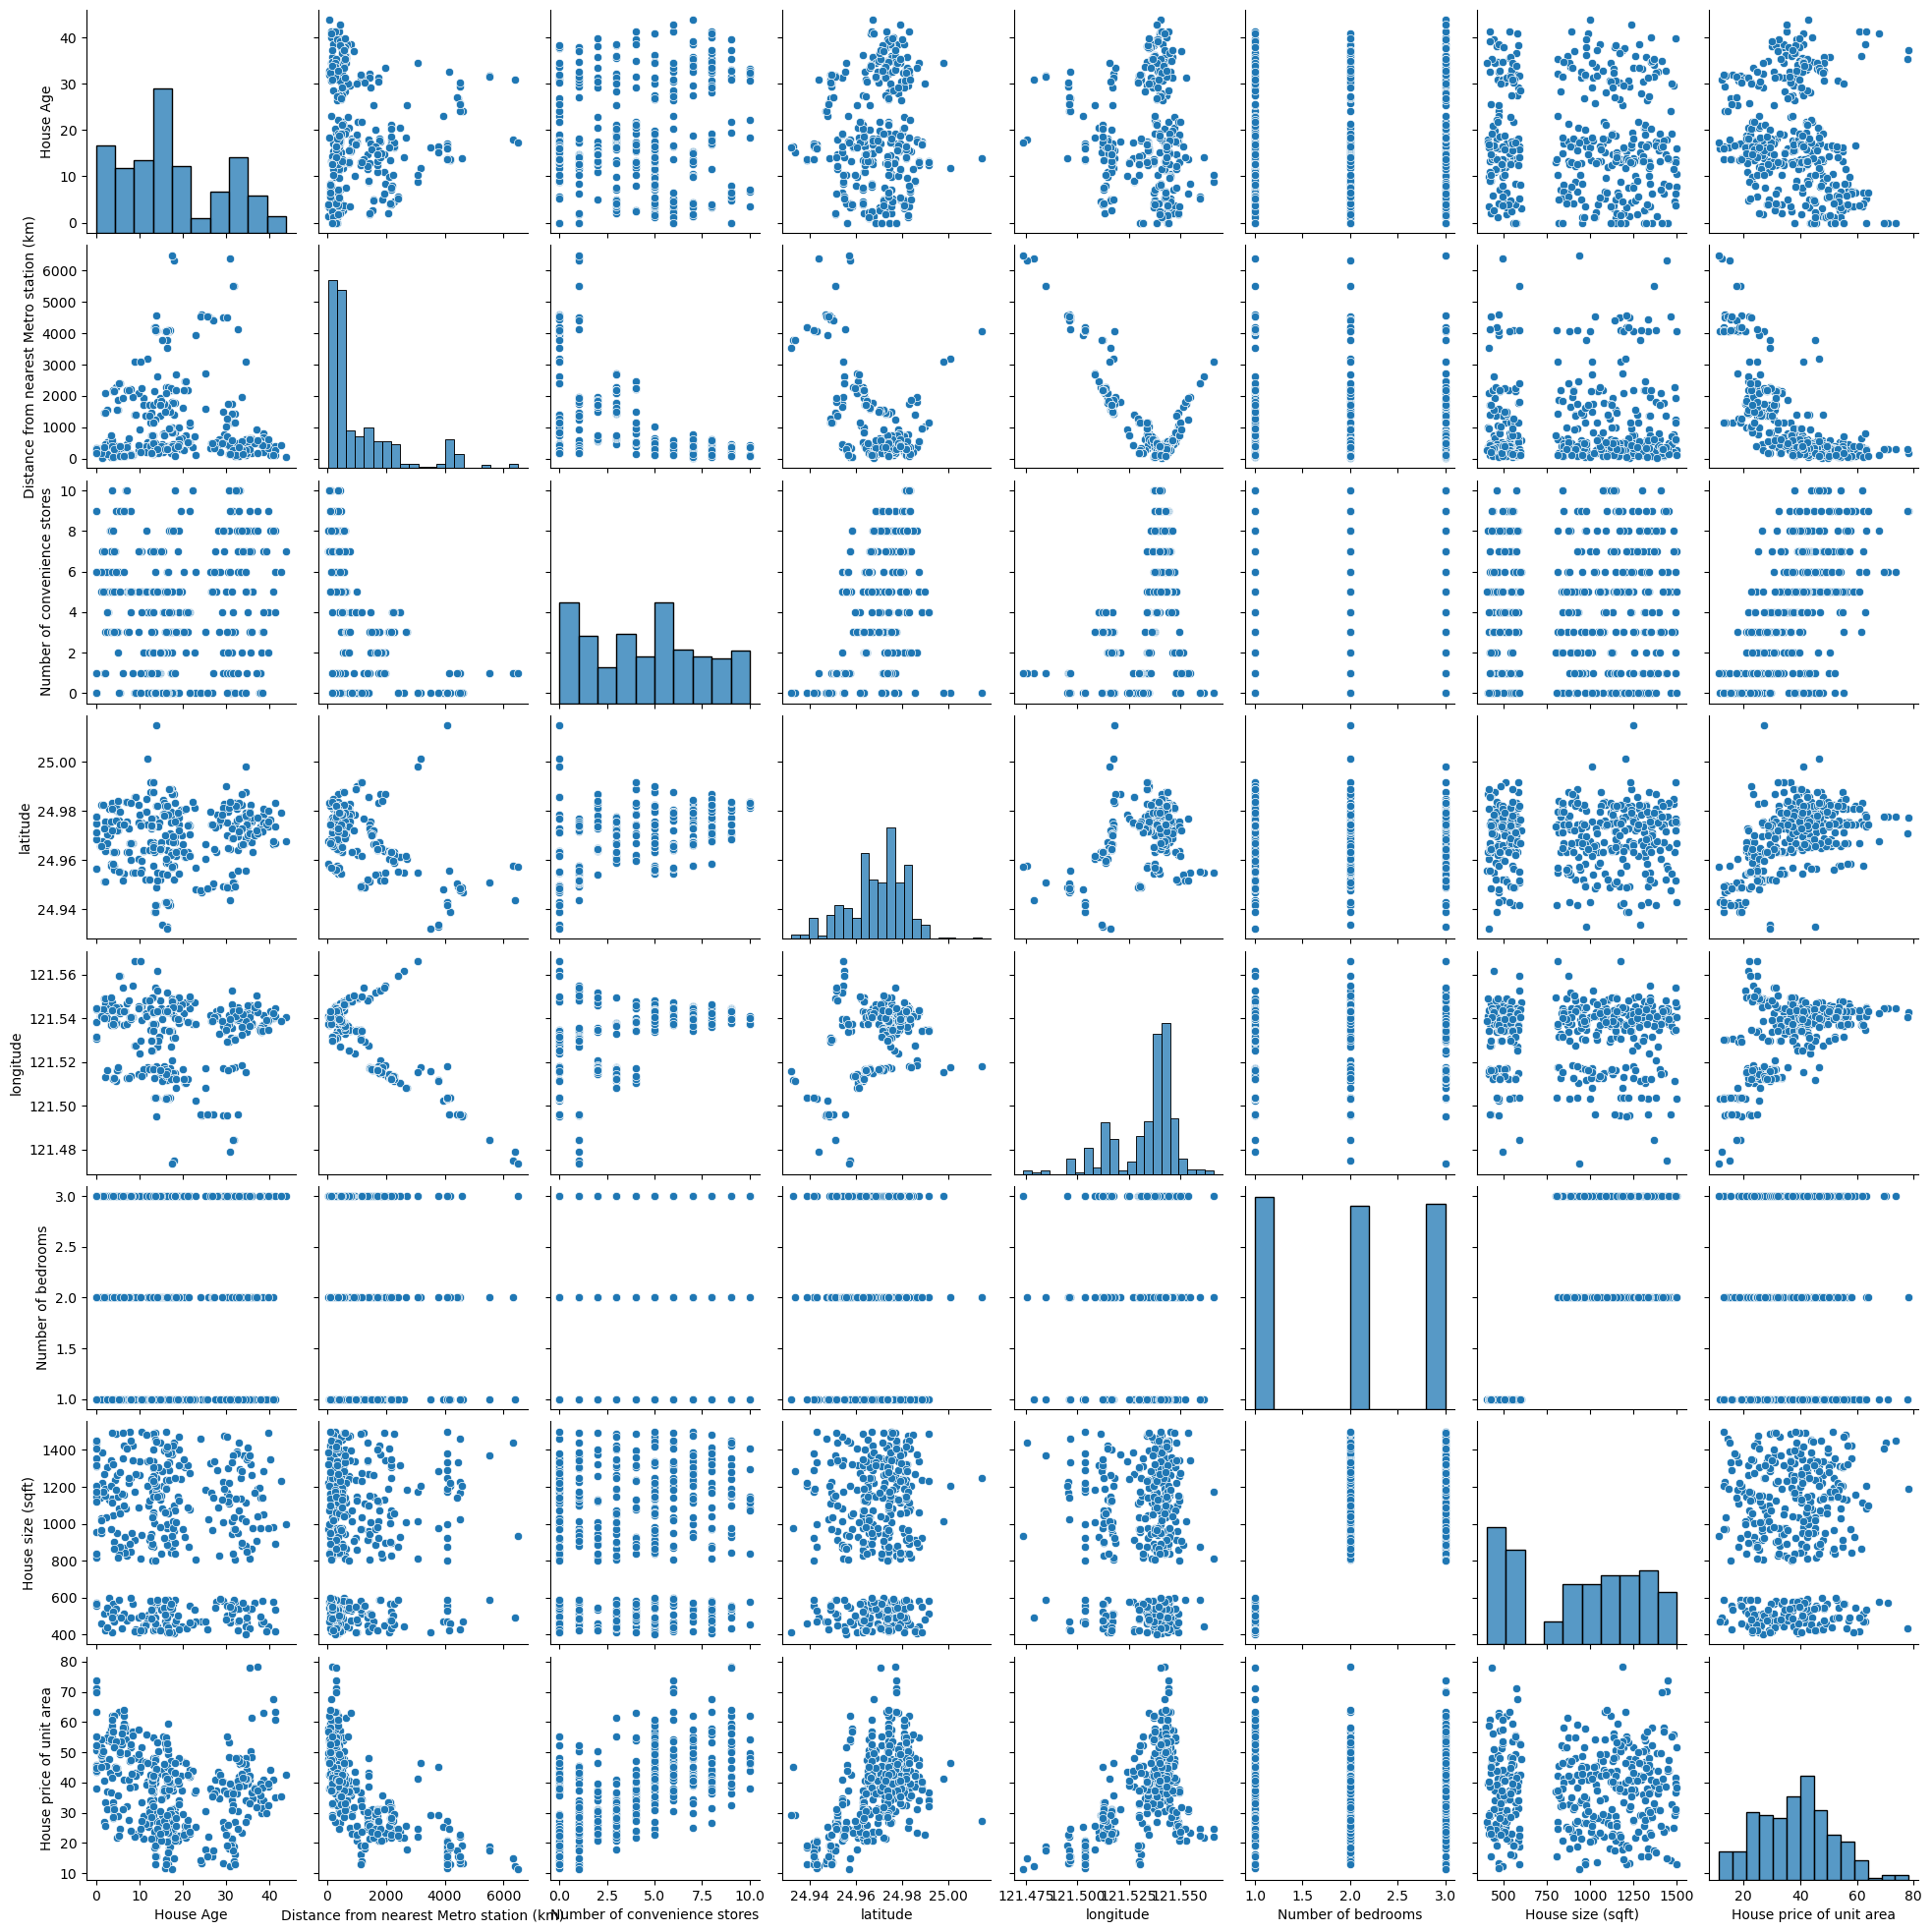

In [19]:
sns.pairplot(df)

## Applying machine learning algorithms

Here I will be applying three algorithms and then will fine tune the hyperparametres by random search cv, grid search sv and will check mean square error, mean absolute error and root mean square error

* The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. 
*  Absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation. It fails to punish outliers

### Multiple linear regression

We dropped number of bedrooms and house size as they are not impacting our dependent variable much

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['House price of unit area','Number of bedrooms','House size (sqft)'], axis=1)
Y = df['House price of unit area']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() 
lm.fit(X_train,Y_train) 

LinearRegression()

In [68]:
print(lm.intercept_)
print(lm.coef_)

-13746.921797491545
[-2.58398537e-01 -3.13559250e-03  1.46520761e+00  2.19860357e+02
  6.82722698e+01]


In [69]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
House Age,-0.258399
Distance from nearest Metro station (km),-0.003136
Number of convenience stores,1.465208
latitude,219.860357
longitude,68.272270


It shows how values like house age, distance from nearest metro station, number of convinience stores, latitude and longitude changes per unit change in slope

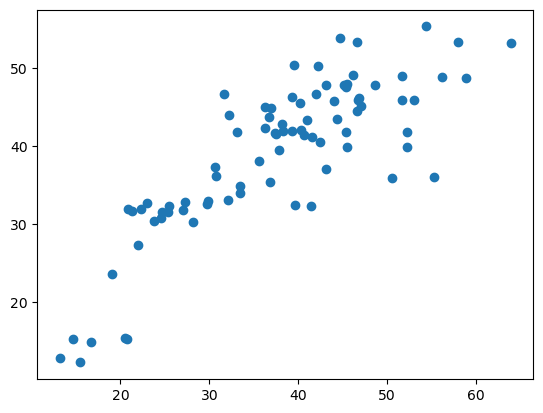

In [70]:
predictions = lm.predict(X_valid)
plt.scatter(Y_valid,predictions)

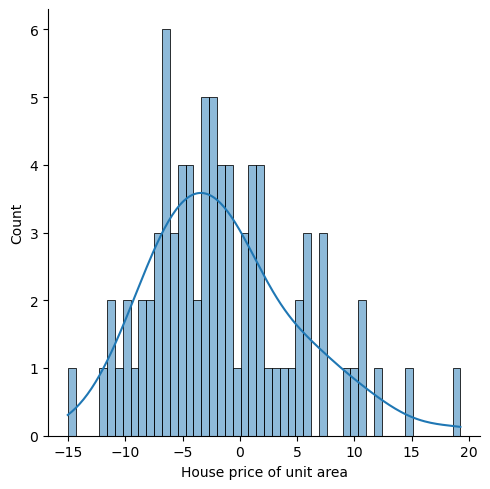

In [71]:
sns.displot((Y_valid-predictions),bins=50,kde = True); 

Here MAE, MSE and RMSE is calculated to show the performance of multivariable linear regression

In [92]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_valid, predictions))
print('MSE:', metrics.mean_squared_error(Y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, predictions))) 

MAE: 5.347489158953739
MSE: 43.278925958262434
RMSE: 6.5786720512777075


### Support vector machine

In [72]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

predictions1 = model_SVR.predict(X_valid)

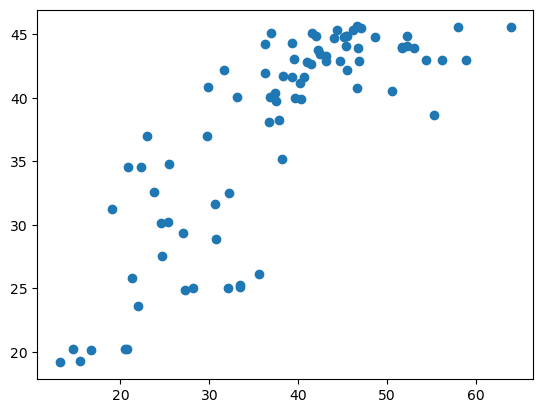

In [73]:
predictions1 = model_SVR.predict(X_valid)  
plt.scatter(Y_valid,predictions1)

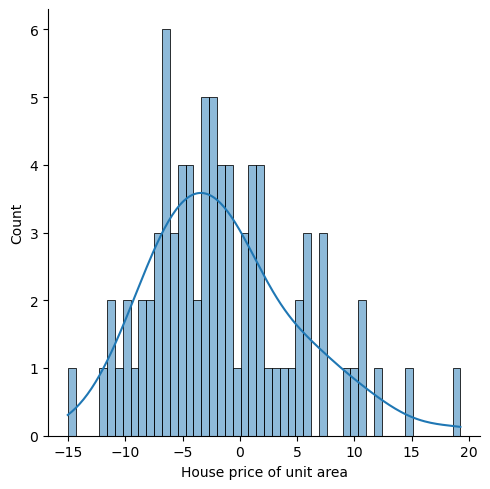

In [74]:
sns.displot((Y_valid-predictions),bins=50,kde = True); 

Here MAE, MSE and RMSE is calculated to show the performance of support vector machine

In [91]:
print('MAE:', metrics.mean_absolute_error(Y_valid, predictions1))
print('MSE:', metrics.mean_squared_error(Y_valid, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, predictions1))) 

MAE: 5.071084873178413
MSE: 45.61611913746517
RMSE: 6.753970620121557


### Random forest regression

In [76]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

predictions2 = model_RFR.predict(X_valid)

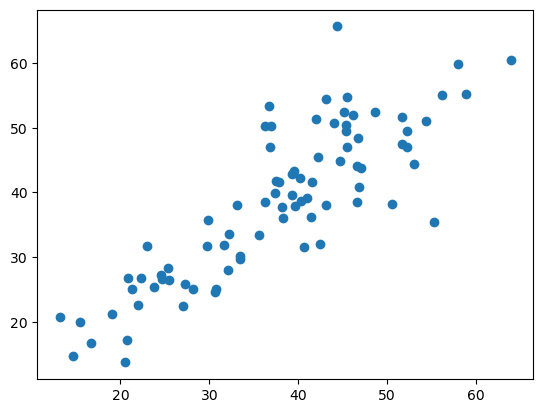

In [77]:
plt.scatter(Y_valid,predictions2)

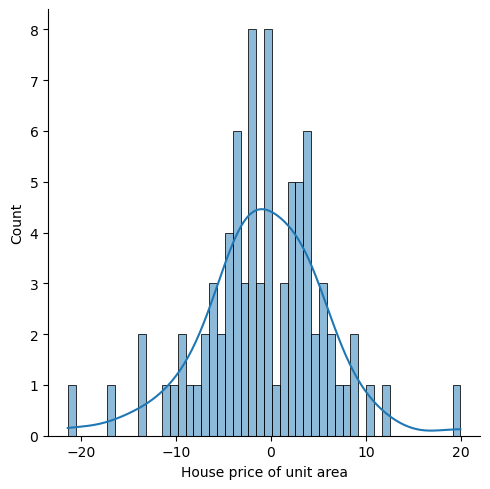

In [78]:
sns.displot((Y_valid-predictions2),bins=50,kde = True); 

Here MAE, MSE and RMSE is calculated to show the performance of random forest regressor

In [90]:
print('MAE:', metrics.mean_absolute_error(Y_valid, predictions2))
print('MSE:', metrics.mean_squared_error(Y_valid, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, predictions2))) 

MAE: 4.796006024096387
MSE: 40.97326266900938
RMSE: 6.401036062155046


### Random forest regressor with randomised search cv

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [38]:
 #Randomized Search CV
    ##helps to find out best important features

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [39]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [41]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [110]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.1s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.1s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.1s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.2s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.3s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.3s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.5s
[CV] END max_depth=5, max_feat

/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.4s


/Users/tribhuvan/Desktop/test_env/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.4s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
predictions3=rf_random.predict(X_valid)
predictions3

array([38.82274818, 53.25773776, 15.87884539, 40.29848042, 48.73308546,
       34.75691397, 48.58798086, 36.40079428, 51.24041025, 27.60189423,
       45.62186121, 35.29643971, 28.53361362, 36.69393019, 49.48203452,
       42.27086854, 35.61840178, 30.83386565, 40.7531338 , 15.80512181,
       40.08829839, 28.13446735, 26.61136091, 49.56823459, 47.46273056,
       38.11226591, 26.07632156, 25.36799776, 24.30301073, 49.43377705,
       42.81785509, 30.61996567, 45.62186121, 39.51020516, 16.35376332,
       30.35755594, 47.4677972 , 37.75813363, 49.93653893, 38.54297467,
       50.21514025, 37.67449586, 50.15979156, 39.83240842, 49.19333632,
       16.11497646, 39.66045802, 47.102777  , 26.50680557, 45.42388081,
       56.79634488, 39.71751822, 46.69112111, 25.97743608, 51.48509328,
       56.93218032, 30.69950373, 43.79191646, 44.04120309, 48.72441892,
       37.69698355, 55.35500341, 18.80120083, 50.21514025, 25.52302281,
       25.27584507, 19.23724882, 24.94474867, 53.16641763, 38.27

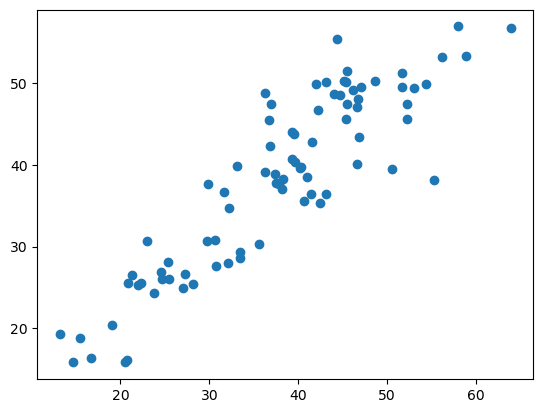

In [45]:
plt.scatter(Y_valid,predictions3)

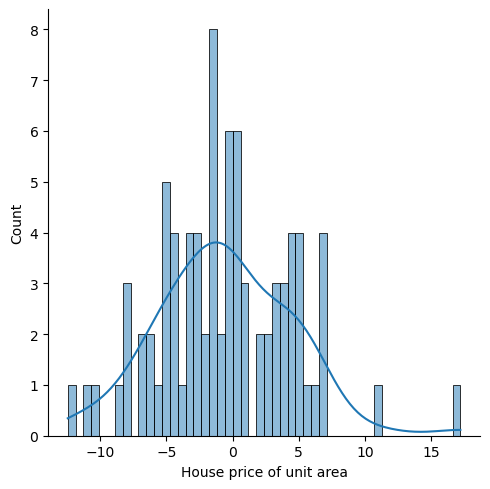

In [44]:
sns.displot((Y_valid-predictions3),bins=50,kde = True); 

Here MAE, MSE and RMSE is calculated to show the performance of random forest regressor tuned with random search cv

In [89]:
print('MAE:', metrics.mean_absolute_error(Y_valid, predictions3))
print('MSE:', metrics.mean_squared_error(Y_valid, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, predictions3))) 

MAE: 3.9642995354281223
MSE: 25.67681401663806
RMSE: 5.06722942214363


### Random forest regressor with grid search cv

In [101]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf1 = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf1, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [102]:
grid_search.fit(X_train, Y_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


In [103]:
rf1.fit(X_train,Y_train)

RandomForestRegressor()

In [104]:
predictions4=rf1.predict(X_valid)
predictions4

array([36.137     , 56.99855   , 13.6534    , 43.728     , 49.323     ,
       34.3868    , 46.6175    , 35.865     , 47.664     , 24.84383333,
       49.10493135, 30.48513333, 29.691     , 33.795     , 43.4057    ,
       49.01      , 32.601     , 26.772     , 40.79933333, 13.136     ,
       39.31625   , 28.70233333, 24.772     , 50.71545873, 49.10760952,
       35.916     , 26.22416667, 24.592     , 24.57366667, 47.21750952,
       41.432     , 30.487     , 49.10493135, 36.921     , 17.5114    ,
       33.16733333, 48.35925   , 38.337     , 51.68625   , 37.801     ,
       51.8232    , 39.343     , 51.6474    , 40.017     , 49.813     ,
       17.706     , 38.9635    , 43.35066667, 26.36533333, 52.59425   ,
       60.61935   , 39.04      , 45.04583333, 26.64125   , 54.6605    ,
       58.8143    , 30.456     , 42.6085    , 42.71733333, 48.1325    ,
       38.20383333, 63.3       , 20.27133333, 51.8232    , 25.83516667,
       24.052     , 20.938     , 20.0205    , 56.42655   , 36.52

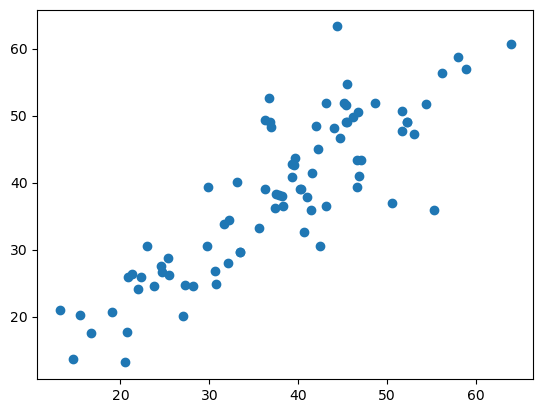

In [105]:
plt.scatter(Y_valid,predictions4)

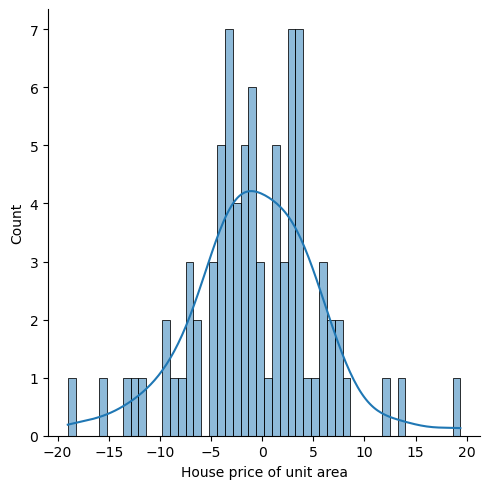

In [106]:
sns.displot((Y_valid-predictions4),bins=50,kde = True); 

Here MAE, MSE and RMSE is calculated to show the performance of random forest regressor tuned with random search cv

In [108]:
print('MAE:', metrics.mean_absolute_error(Y_valid, predictions4))
print('MSE:', metrics.mean_squared_error(Y_valid, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_valid, predictions4))) 

MAE: 4.691106091030791
MSE: 38.16361600880925
RMSE: 6.177670759178515


### Comparison table

| | Algorithm  | MAE(Mean Absolute Error)    | MSE(Mean Squared Error)  | RMSE(Root Mean Squared Error)   |
|---:|:-------------|:-----------|:------|:------|
| 1 | Linear regression  | 5.347       | 43.279   | 6.579    |
| 2 | Support vector machine  | 5.071    | 45.617   | 6.753     |
| 3 | Random forest regressor | 4.796    | 40.973   | 6.401    |
| 4 | Random forest regressor (random search cv) | 3.964    | 25.677   | 5.067     |
| 5 | Random forest regressor (grid search cv)  | 4.669    | 37.328   | 6.109     |

### Explanation

The above table represents the performance of different models with their performance scores

* The reason why linear regression has worst performance because the realtion between the various features is not exactly linear, while linear regression perfroms best when the relation is linear.
* Random forest gives the better performance as compared to svm because in svm we have concept of maximizing the "margin", hence relies on the concept of distance between different points. So scaling is required in order to implement this concept of distance. Random forest works with every kind of data. In our data we have data which is having a lot of varying magnitudes (like latitudes, longitudes has  a lot of difference in values from number of stores or distance from metro). Although where svm can be applied it works best.
* Talking about random forest with random search cv and grid search cv, we use random search cv and grid search cv in order to fine tune the hyperparametres of our base mode (which in this case is random forest regressor). Here we got best results from random search cv as it randomly create combinations of the hyperparameters are used to find the best solution for the built model. It is similar to grid search, and yet it has proven to yield better results comparatively. 
* Grid search works good for small datasets, but with larger datasets (taking same resources and time) random search outperfroms grid search

### References

1.https://trace.tennessee.edu/cgi/viewcontent.cgi?article=7047&context=utk_gradthes#:~:text=Random%20search%20can%20work%20better,better%20than%20both%20of%20them.
2.https://www.researchgate.net/publication/274638232_Performance_of_Random_Forest_and_SVM_in_Face_Recognition#:~:text=The%20SVM%20achieved%20accuracy%20of,of%20SVM%2C%20RF%20and%20classification.